## Regularization

We would like to restrict the space of least-square solutions $\vec \theta$, which minimize the least-squares loss function

$$ \large L_\text{LS}(\vec \theta) = \| \vec y - \Phi \vec \theta \|^2_2,$$

where $\Phi$ is the $m \times n$ design matrix, $\vec y$ is the observation vector and $\vec \theta$ is the vector of coefficients we are trying to solve for. The least-squares solution is the $\vec \theta$ that minimizes this:

$$ \large \vec\theta_\text{LS} = \arg\min L_\text{LS}(\vec \theta).$$


Two regularization techniques:
* L1 regularization (aka **Lasso**):
$$\large L_\text{Lasso}(\vec \theta) = \| \vec y - \Phi \vec \theta \|_2^2 + \lambda \| \vec \theta\|_1.\\ $$

* L2 regularization (aka **Ridge (or Tikhonov) Regularization**):
$$\large L_\text{Ridge}(\vec \theta) = \| \vec y - \Phi \vec \theta \|_2 ^2 + \lambda \| \vec \theta\|_2^2 $$

## Ridge Regression






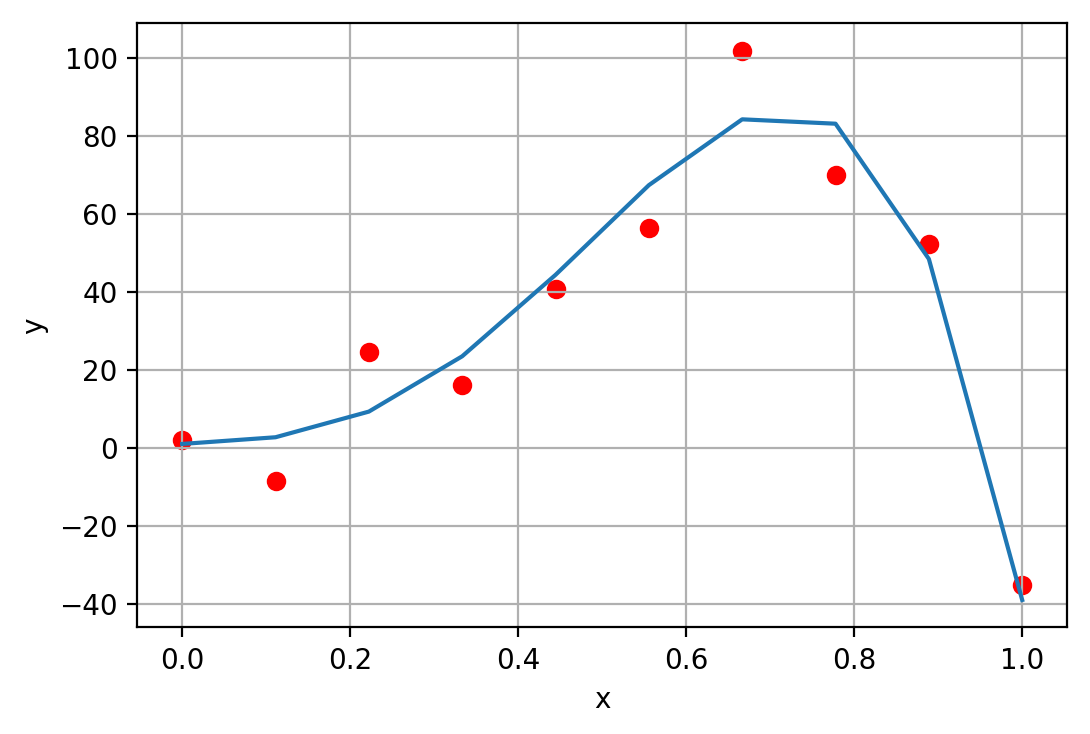

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
# -----------------------------


x = np.linspace(0, 1, 10)
y = 1 + 10*x - 50*x**2 +1000*x**3 - 1000*x**4
W = np.random.normal(0, 10, len(y))
y_obs = y + W


plt.scatter(x, y_obs, color='r')
plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [30]:
# Lets try to fit a degree 10 polynomial

Phi = np.vander(x, 11, increasing=True)

# Print out rank for our information
rank = np.linalg.matrix_rank(Phi)
num_cols = Phi.shape[1]
print("Phi has rank = " + str(rank))
print("n = " + str(num_cols))

# Get least squares solution
theta_ls = np.linalg.lstsq(Phi, y_obs, rcond=None)[0]


Phi has rank = 10
n = 11


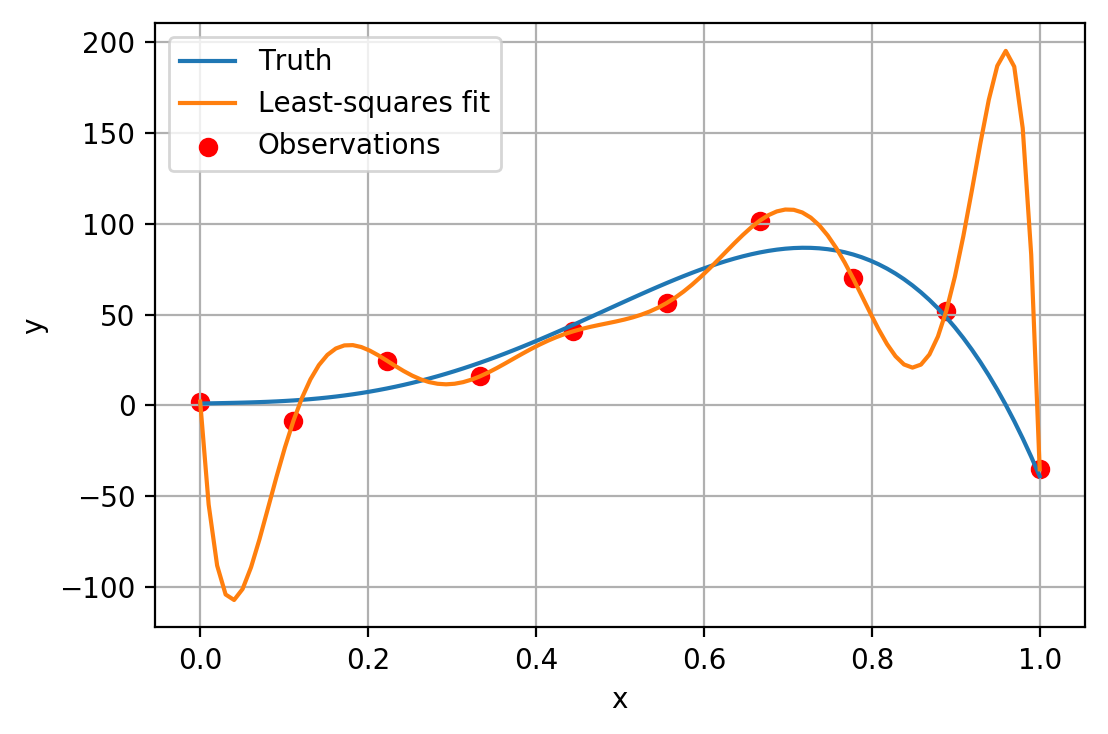

In [31]:
# make a more refined plot of the model
x_plot = np.linspace(0, 1, 100)
Phi_plot = np.vander(x_plot, 11, increasing=True)
# @ is matrix multiplication
y_model = Phi_plot @ theta_ls
y_plot = 1 + 10*x_plot - 50*x_plot**2 +1000*x_plot**3 - 1000*x_plot**4


plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_model)
plt.scatter(x, y_obs, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Least-squares fit', 'Observations'])

We see from the above that this is an overfit. A typical outcome of overfitting is that the coefficients are take on unrealistic values.


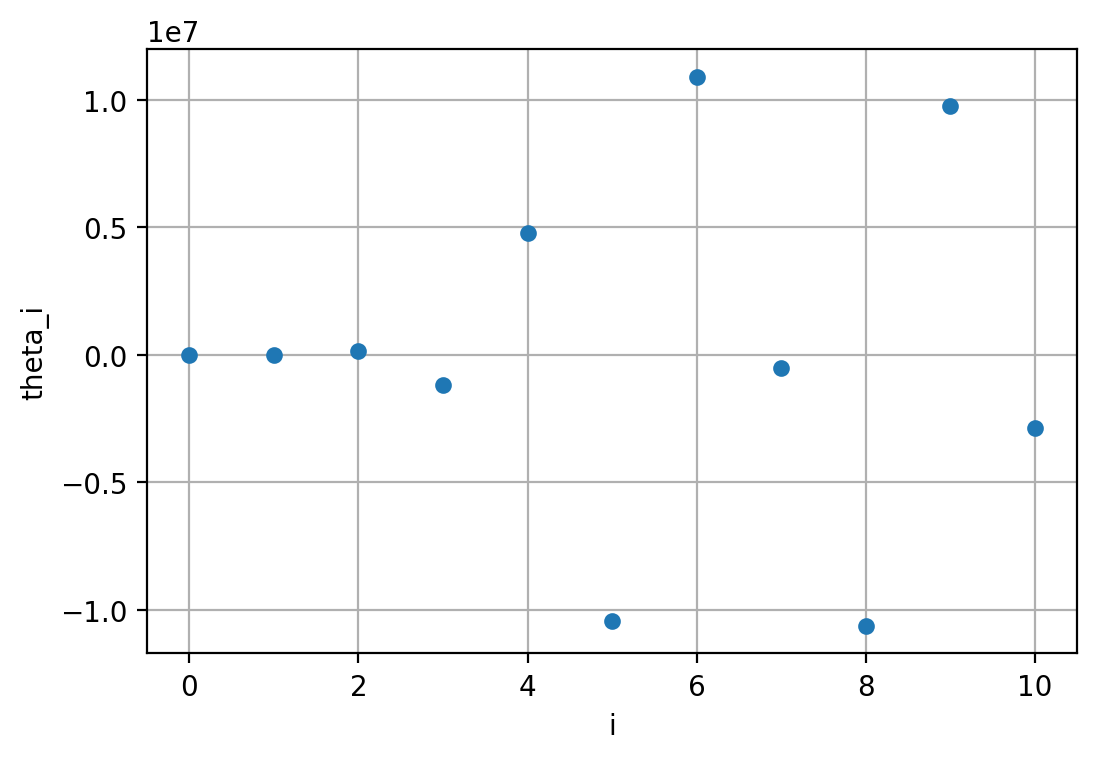

In [32]:
# What theta values do we get?
plt.plot(theta_ls, linewidth=0, marker='o', markersize=5)
plt.xlabel('i')
plt.ylabel('theta_i')
plt.grid()

We would like to control or penalize large values of theta to avoid this type of behavior. So instead of minimizing least squares loss, we'll introduce a penalty term for large coefficient values:

$$\large L_\text{Ridge}(\vec \theta) = \| \vec y - \Phi \vec \theta \|_2 ^2 + \lambda \| \vec \theta\|_2^2 $$

We'll use the library: `sklearn.linear_model.Ridge` for now. 

In [33]:
from sklearn.linear_model import Ridge

# We'll do this in three steps. First we set up the model, then we fit it. Then we get the coefficients

# 1. set up model. Here alpha is what we've been calling lambda above
ridge_model = Ridge(alpha = 1.0)

# 2. Fit the model
ridge_model.fit(Phi, y_obs)

# 3. Get coefficients
theta_ridge = ridge_model.coef_

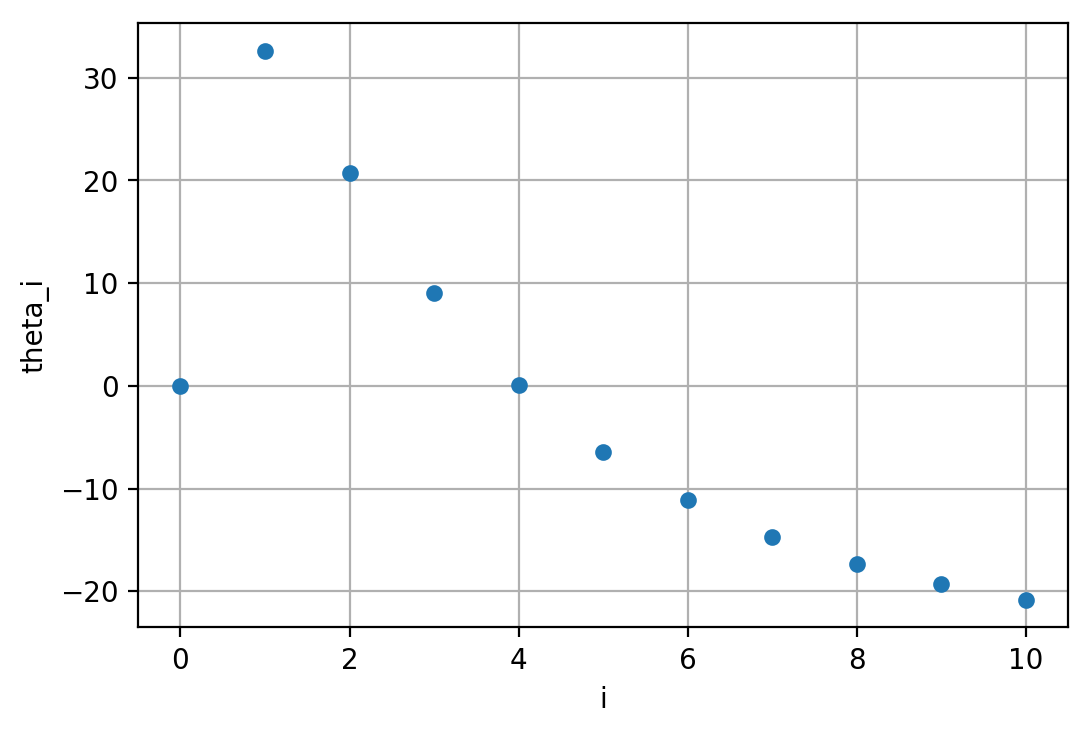

In [34]:
plt.plot(theta_ridge, linewidth=0, marker='o', markersize=5)
plt.xlabel('i')
plt.ylabel('theta_i')
plt.grid()

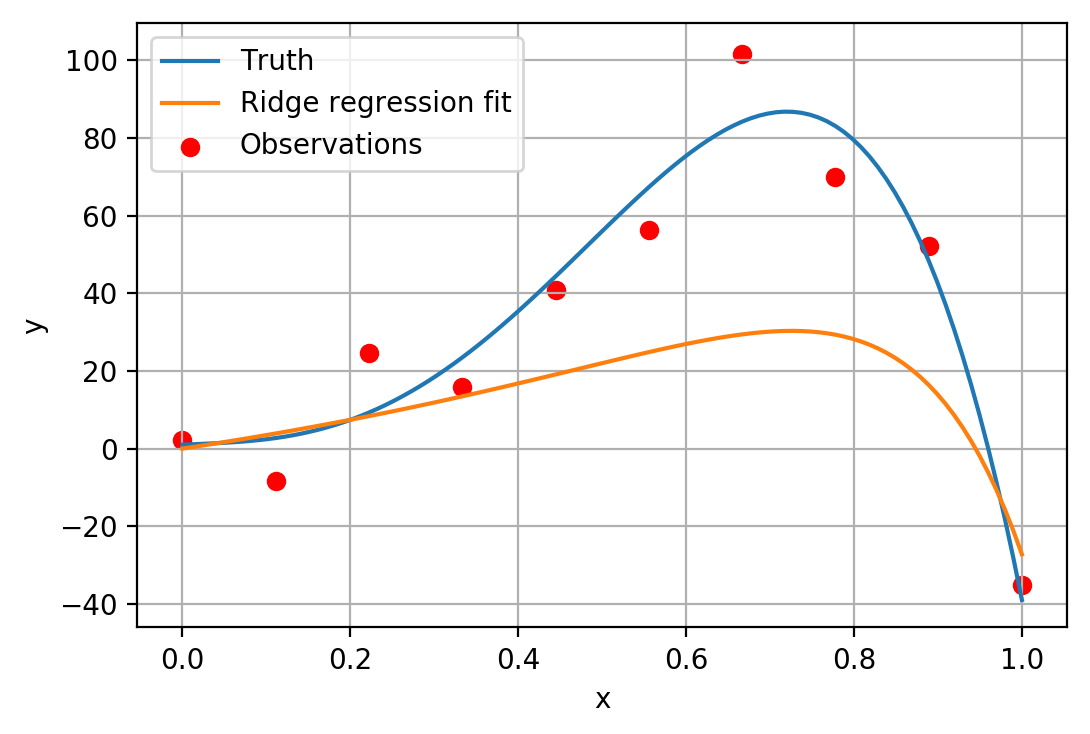

In [35]:
y_model = Phi_plot @ theta_ridge
plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_model)
plt.scatter(x, y_obs, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Ridge regression fit', 'Observations'])

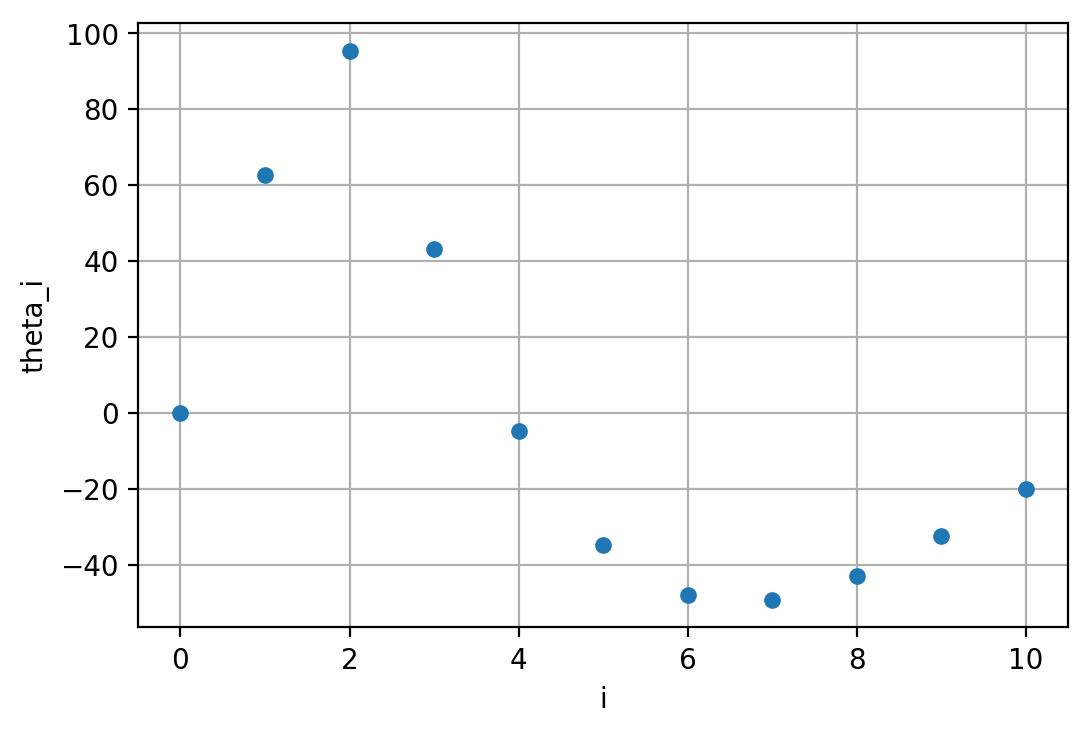

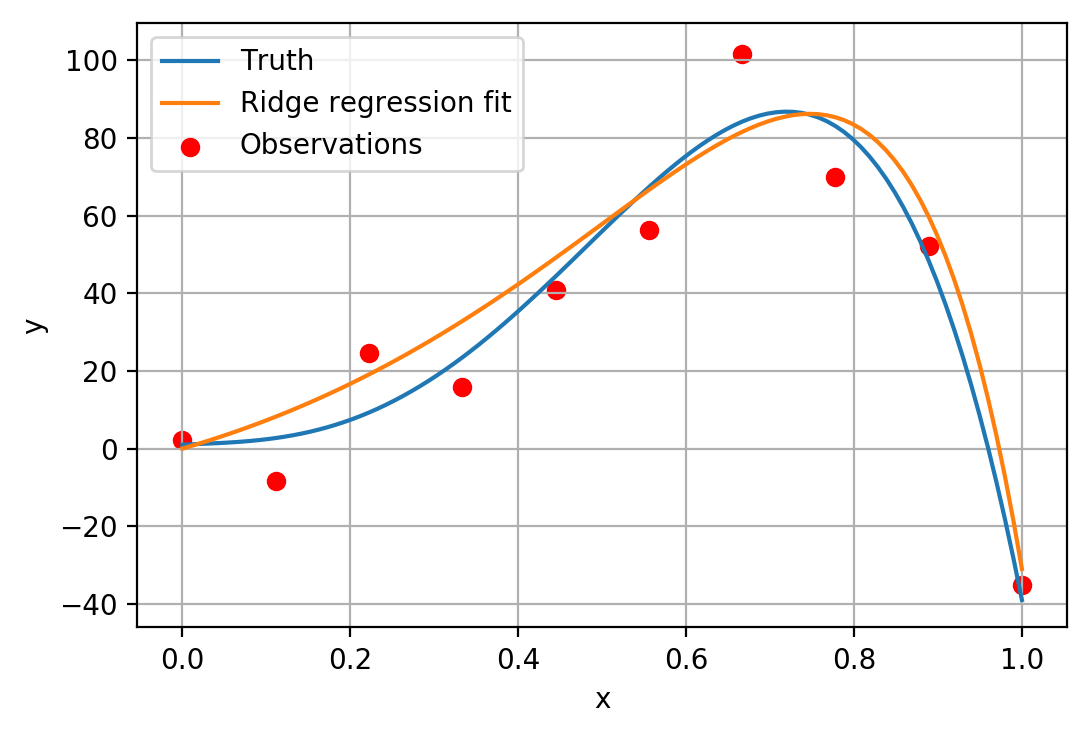

In [36]:
# Let's try lowering penality.
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(Phi, y_obs)
theta_ridge = ridge_model.coef_

# plot theta
plt.plot(theta_ridge, linewidth=0, marker='o', markersize=5)
plt.xlabel('i')
plt.ylabel('theta_i')
plt.grid()

# plot model
y_model = Phi_plot @ theta_ridge
plt.figure()
plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_model)
plt.scatter(x, y_obs, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Ridge regression fit', 'Observations'])

## Normalization



In [37]:
# Z-normalization
mu_y = np.mean(y_obs)
sig_y = np.std(y_obs)
y_norm = (y_obs - mu_y)/sig_y

mu_Phi = np.mean(Phi)
sig_Phi = np.std(Phi)
Phi_norm = (Phi - mu_Phi)/sig_Phi

# Fit intercept set to false here since we've normalized our data
ridge_model = Ridge(alpha = 0.01, fit_intercept=False)
ridge_model.fit(Phi_norm, y_norm)
theta_ridge = ridge_model.coef_

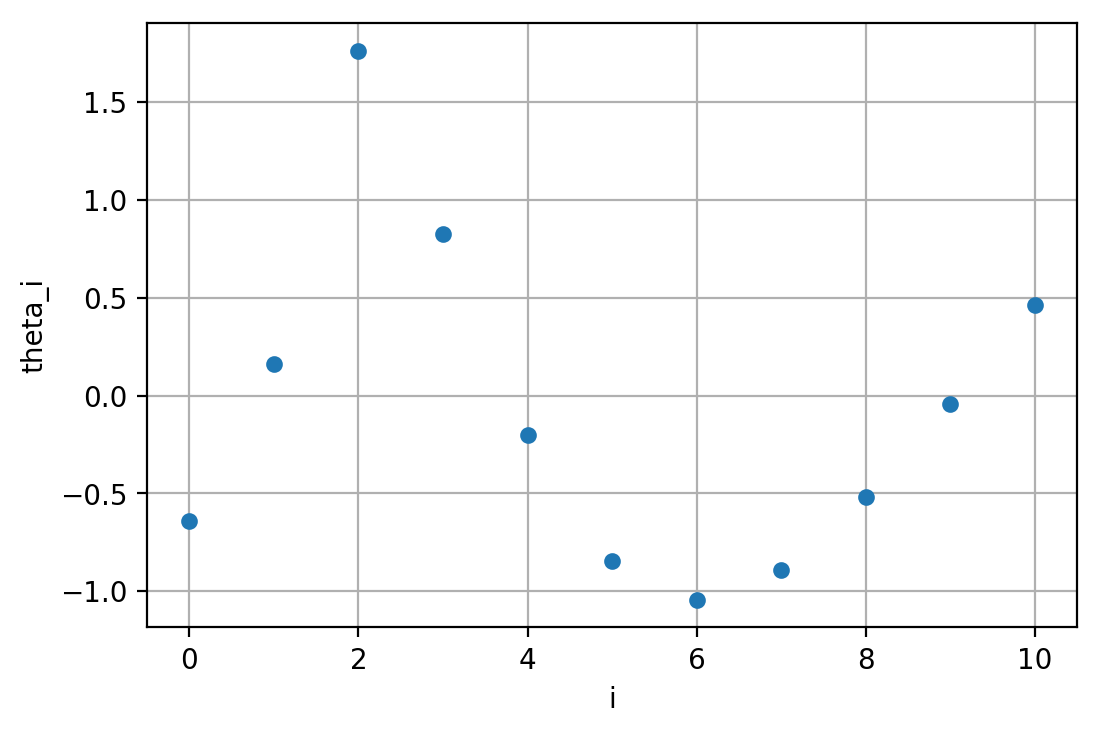

In [38]:
# plot theta
plt.plot(theta_ridge, linewidth=0, marker='o', markersize=5)
plt.xlabel('i')
plt.ylabel('theta_i')
plt.grid()

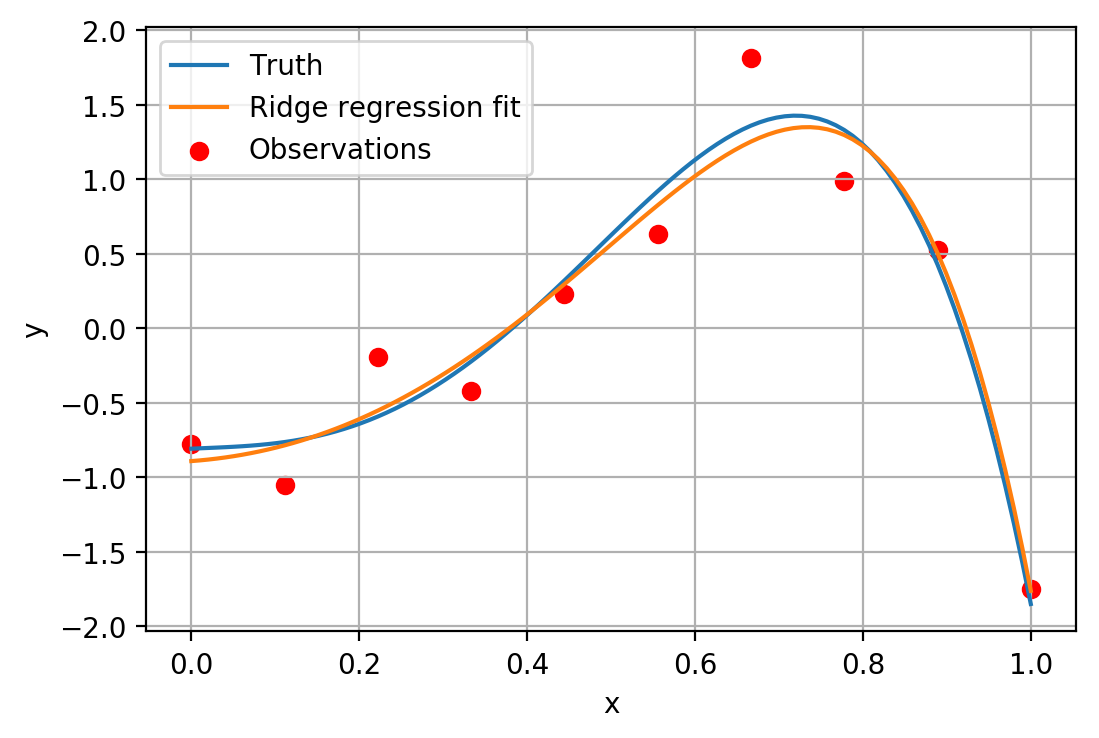

In [39]:
# Apply same transformation to Phi_plot
Phi_plot_norm = (Phi_plot - mu_Phi) / sig_Phi

# Apply same transformation to y_plot
y_plot_norm = (y_plot - mu_y)/sig_y

# plot model
y_model = Phi_plot_norm @ theta_ridge
plt.figure()
plt.plot(x_plot, y_plot_norm)
plt.plot(x_plot, y_model)
plt.scatter(x, y_norm, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Ridge regression fit', 'Observations'])

# Lasso


Lasso is very similar to Ridge, except that we penalize the 1-norm of the coefficients, which we've seen induces sparsity.



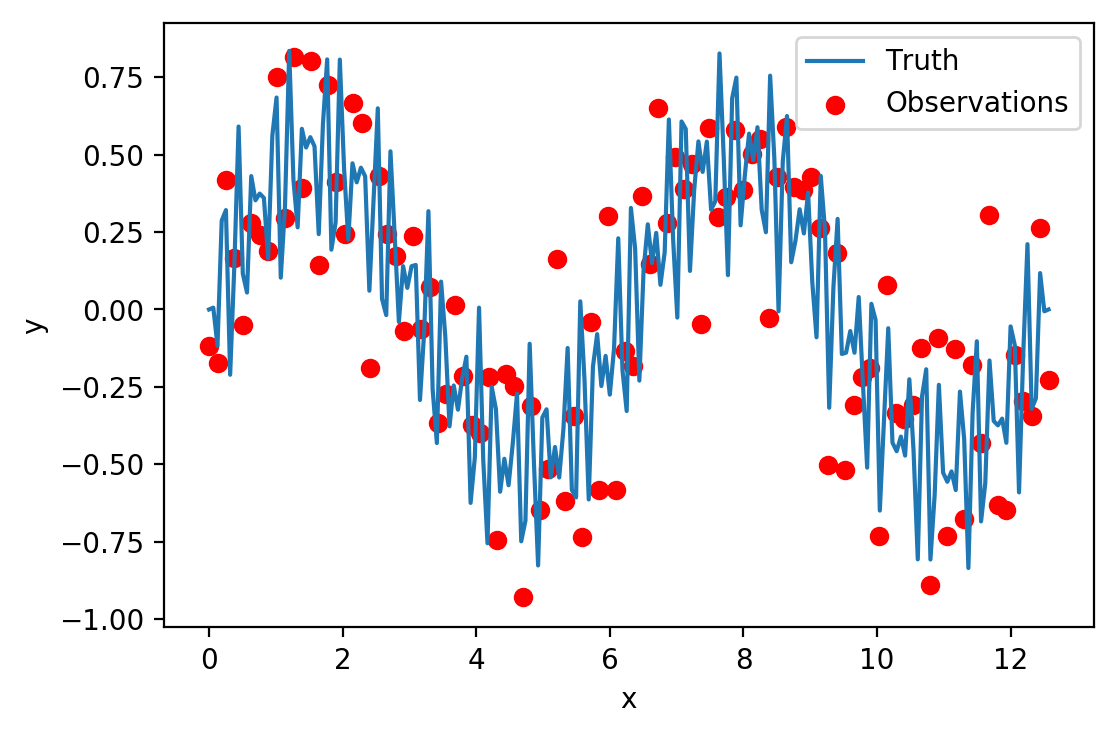

In [47]:
# The true function
def f(x):
    return 0.5*np.sin(x) + 0.2*np.sin(33.0*x) + 0.2*np.sin(75.0*x)

# generate some data
x = np.linspace(0, 4*np.pi, 100)
y = f(x)
W = np.random.normal(0, 0.2, len(y))
y_obs = y + W

# generate truth over a more refined set just for plotting purposes
x_plot = np.linspace(0, 4*np.pi, 200)
y_plot = f(x_plot)

# Plot truth and noisy observations
plt.plot(x_plot, y_plot)
plt.scatter(x, y_obs, color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Observations'])

Before, when we were using the power series basis $\left\{1, x, x^2, ... , x^{n-1}\right\}$, the corresponding design matrix was called the Vandermonde matrix, and we had a special `numpy` function to build that for us called `numpy.vander`. For the Fourier basis $\left\{1, \sin(x), \sin(2x), ..., \sin((n-1)x)\right\}$, we'll have to make our own function to form the corresponding design matrix.

In [41]:
# Builds the design matrix Phi for a input data X = (x_1, ..., x_m)
# where Phi_ij = sin(j*x_i) for j = 0, ..., n-1
def form_fourier_design_matrix(X, n):
    # number of rows = m = number of data points
    num_rows = X.shape[0]
    # number of columns = n = number of basis functions
    num_cols = n
    
    # Allocate a m-by-n matrix of all zeros for now
    Phi = np.zeros([num_rows, num_cols])
    
    # iterate over data points
    for i, x_i in enumerate(X):
        # iterate over basis functions
        for j in range(n):
            # Apply the j-th basis function to the i-th data point
            Phi[i,j] = np.sin(j*x_i)      
            
    return Phi

In [ ]:
# Alternatively, we could have done this, since numpy.sin can operate on the entire set of data at a time:
def form_fourier_design_matrix(X, n):
    # number of rows = m = number of data points
    num_rows = X.shape[0]
    # number of columns = n = number of basis functions
    num_cols = n
    
    # Allocate a m-by-n matrix of all zeros for now
    Phi = np.zeros([num_rows, num_cols])
    
    # iterate over basis functions
    for j in range(n):
        # Apply the j-th basis function to the entire 
        # set of data and store as the j-th column of Phi
        Phi[:,j] = np.sin(j*X)      
            
    return Phi


Now we'll do Lasso regression. The steps are exactly the same as Ridge regression:

1. Form the design matrix
2. Normalize the columns of the design matrix, as well as your observations
3. Call Lasso fitting library to find the coefficients that minimize the Lasso loss function

In this context, we are pretending that we know that the truth is comprised of a small set of $sin(jx)$ functions, but
we don't know which ones. We'll throw in the first 100 basis functions $\sin(jx)$ and rely on the sparsity of our Lasso solution to help us pick out the small set.

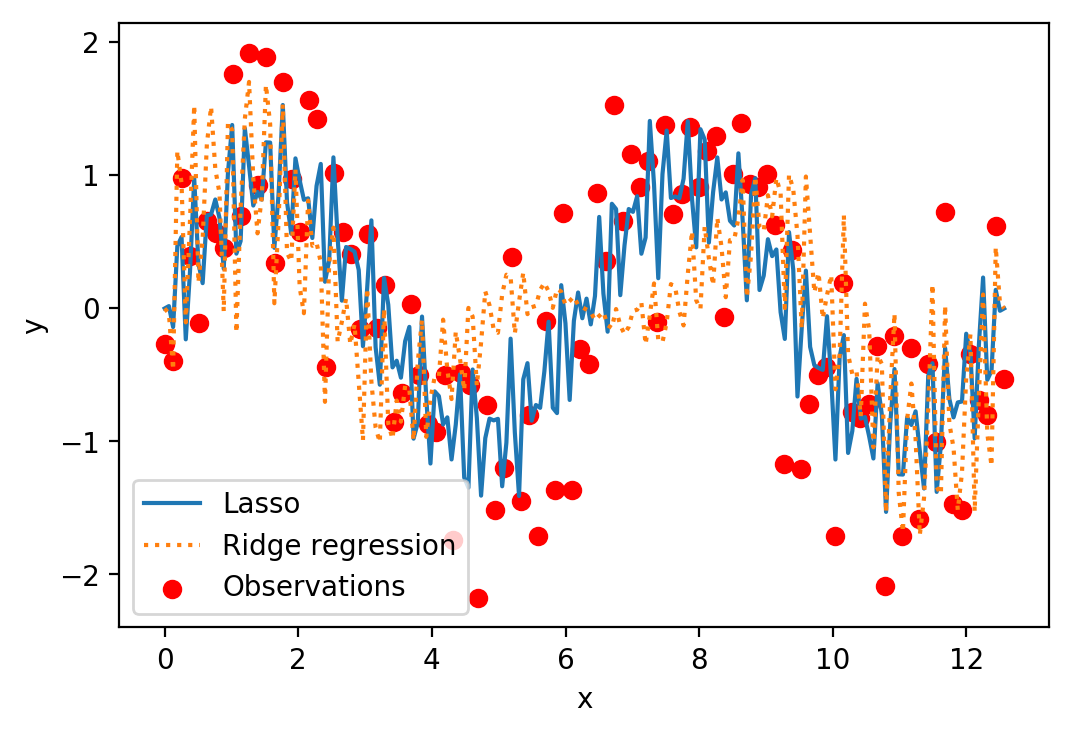

In [53]:
# Import the Lasso class from sklearn.linear_model
from sklearn.linear_model import Lasso

# 1. Form the design matrix.
NUM_BASIS = 100
Phi = form_fourier_design_matrix(x, NUM_BASIS)

# 2. Normalize observations
mu_y = np.mean(y_obs)
sig_y = np.std(y_obs)
y_norm = (y_obs - mu_y)/sig_y

# Also normalize columns of design matrix
mu_Phi = np.mean(Phi)
sig_Phi = np.std(Phi)
Phi_norm = (Phi - mu_Phi)/sig_Phi

# Perform the Lasso fit
lasso_model = Lasso(alpha = 0.1, max_iter = 10000, fit_intercept=False)
lasso_model.fit(Phi_norm, y_norm)
# Get the Lasso parameters
theta_lasso =  lasso_model.coef_

# Do ridge regression solution for comparison
ridge_model = Ridge(alpha = 0.1, fit_intercept=False)
ridge_model.fit(Phi_norm, y_norm)
theta_ridge = ridge_model.coef_

# Apply models by predicting the y values for the refined set of x values in x_plot
Phi_plot = form_fourier_design_matrix(x_plot, NUM_BASIS)
Phi_plot = (Phi_plot - mu_Phi)/sig_Phi
# Multiply design matrix by the thetas found in both lasso and ridge regression
y_lasso = Phi_plot @ theta_lasso
y_ridge = Phi_plot @ theta_ridge

# Plot 
plt.plot(x_plot, y_lasso)
plt.plot(x_plot, y_ridge, ls=':')
plt.scatter(x, y_norm, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Lasso', 'Ridge regression', 'Observations'])

We can calculate some measure for goodness of fit. Let's use relative error:

In [55]:
# Lasso prediction on the data
y_lasso = Phi_norm @ theta_lasso
# Residual
r_lasso = y_norm - y_lasso
# Relative error
rel_err_lasso = np.linalg.norm(r_lasso)/np.linalg.norm(y_norm)

# Ridge prediction on the data
y_ridge = Phi_norm @ theta_ridge
r_ridge = y_norm - y_ridge
rel_err_ridge = np.linalg.norm(r_ridge)/np.linalg.norm(y_norm)


print('Lasso Rel. Error = ' + str(rel_err_lasso))
print('Ridge Rel. Error = ' + str(rel_err_ridge))

Lasso Rel. Error = 0.450413615653685
Ridge Rel. Error = 0.2868387327752686


Not great, but let's see if we can identify which $sin(jx)$ contributed to the signal. To do that, we'll plot the $\theta$ values.

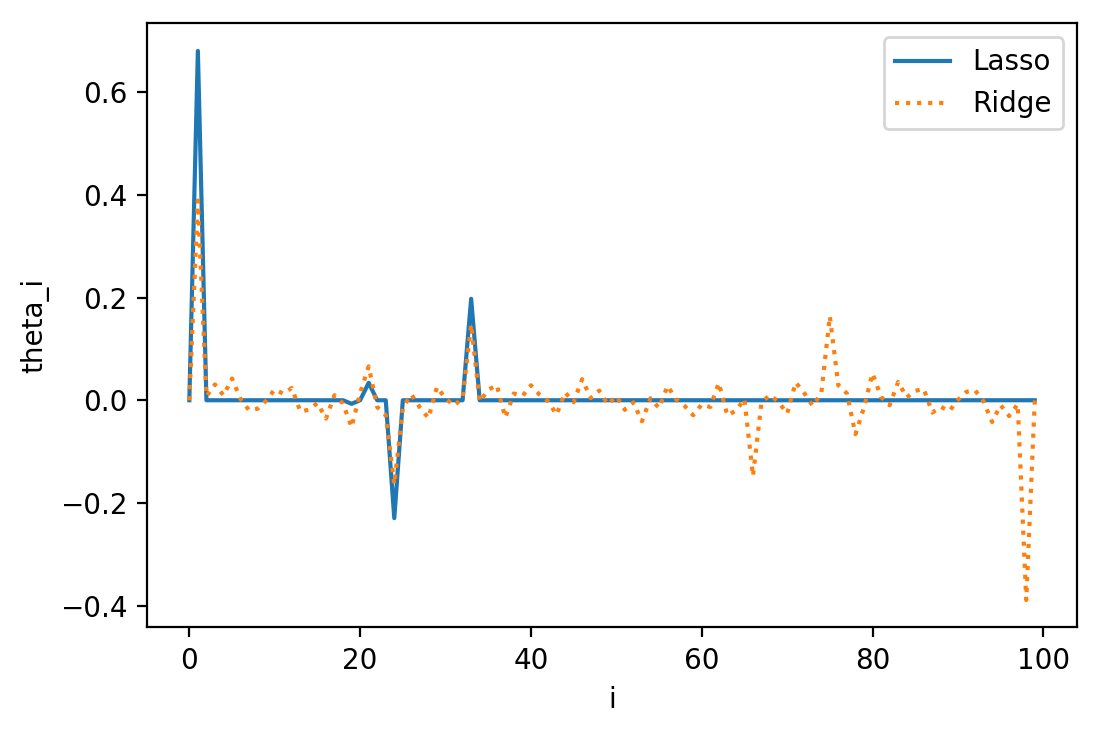

In [56]:
plt.plot(theta_lasso)
plt.plot(theta_ridge, ls=':')

plt.xlabel('i')
plt.ylabel('theta_i')
plt.legend(['Lasso', 'Ridge'])

We see that the Lasso estimate for the $\theta$ is quite sparse. Only about 5 out of 100 entries are non-zero. Remember, a relatively large non-zero value of $\theta_j$ says that the regression believes $\sin(jx)$ contributes to the signal (the observations). It doesn't appear that we're picking the correct $\sin$ functions, which were:

$$\left\{\sin(x), \sin(33x), \sin(75x) \right\}.$$

Maybe we didn't pick the $\lambda$ correctly. Let's use the `LassoCV` to pick the best $\lambda$ using cross validation.

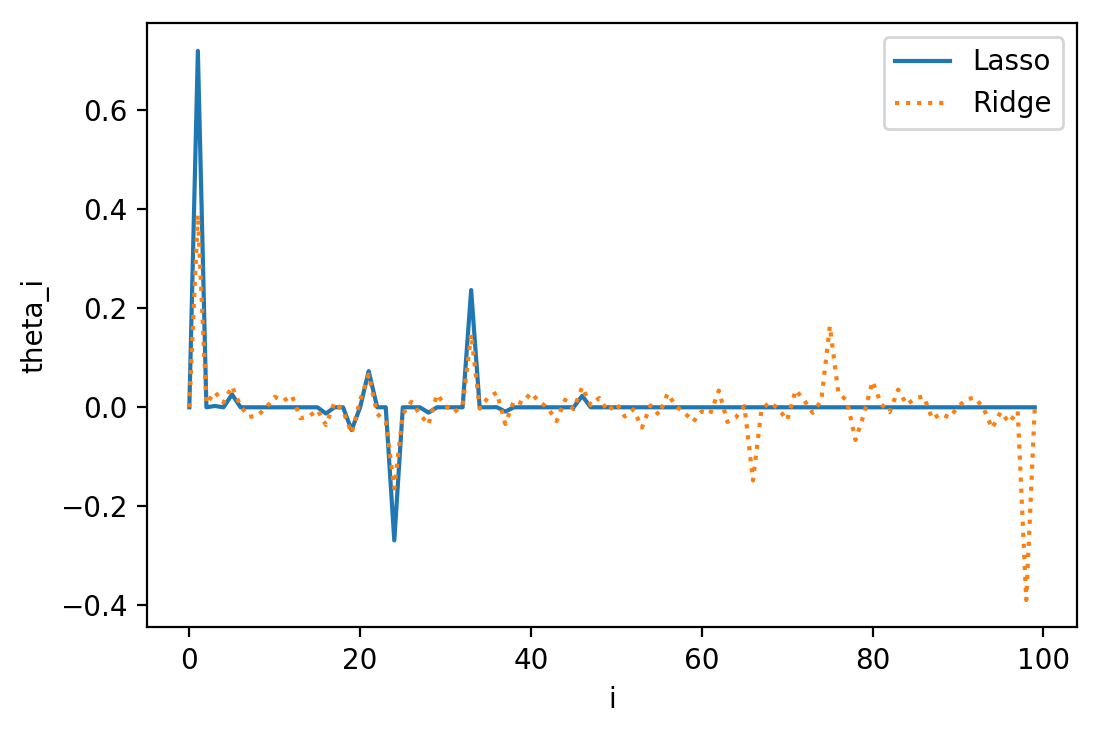

In [57]:
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(fit_intercept=False)
lasso_model.fit(Phi_norm, y_norm)
theta_lasso =  lasso_model.coef_

y_lasso = Phi_plot @ theta_lasso

plt.plot(theta_lasso)
plt.plot(theta_ridge, ls=':')

plt.xlabel('i')
plt.ylabel('theta_i')
plt.legend(['Lasso', 'Ridge'])

Still not a great fit, and in reality, without extra information, this is perhaps the best we can hope to do. One extra piece of information, which is very common, is that we could assume that the $\theta$ values are all positive, which we can force the `LassoCV` class to do by passing in the `positive = True` argument.

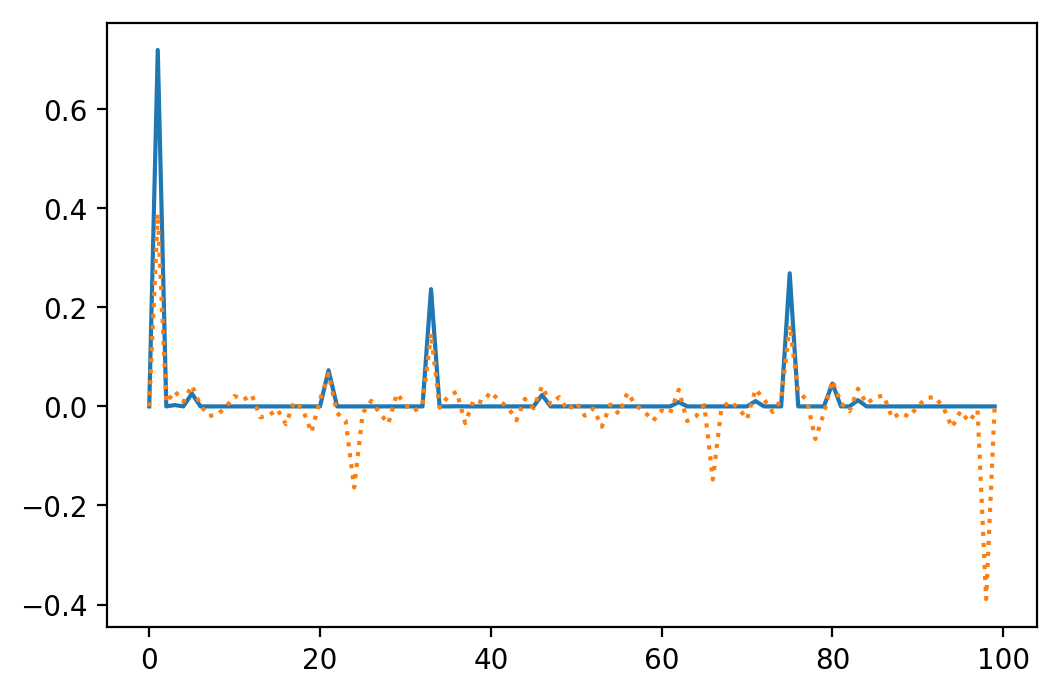

In [61]:
lasso_model = LassoCV(fit_intercept=False, positive = True)
lasso_model.fit(Phi_norm, y_norm)
theta_lasso =  lasso_model.coef_

Phi_plot = form_fourier_design_matrix(x_plot, NUM_BASIS)
Phi_plot = (Phi_plot - mu_Phi)/sig_Phi
y_lasso = Phi_plot @ theta_lasso
y_ridge = Phi_plot @ theta_ridge

plt.plot(theta_lasso)
plt.plot(theta_ridge, ls=':')

We see that doing yields good results. The three largest coefficient values in the Lasso estimate correspond exactly to the true $\sin(jx)$ functions. The Lasso solution also predicts the presense of other function in the signal as well, but the magnitude of the corrsponding $\theta$ values aren't as large.